# tldr

Other notebooks in this repository cover the details in analyzing, combining, ... this type of data.

I'd like to step back a bit and start to define an `application` using this type of content.

# Identifying Problems

Daniel at scalesd posted a link to a talk by Beryl Forman on [Creative Mornings](https://creativemornings.com/talks/beryl-forman-virtual/1).  She's an urban planner, working for The Boulevard.  It's an interesting talk.  It gave me a couple of ideas on how to use the data I've been collecting.

1. She talked about a [city study](https://www.sandiego.gov/planning/programs/transportation/mobility/ecblvdstudy).  Interesting `words` from the intro:

> `...recommendations that ultimately would catalyze meaningful and transformative investments on El Cajon Boulevard to facilitate a beautiful, vibrant and welcoming area for shopping, eating, neighborhood services, and pedestrian activity for residents and visitors.`

> `...re-envisioned as a “complete street,” one that is intended to provide safe access for all users including pedestrians, transit riders, bicyclists, and motorists.`

2. She mentions [Vision Zero](https://www.sandiego.gov/vision-zero).  Two of the most dangerous intersections are on the Boulevard.  Safe access to local businesses is greatly enhanced if this is controlled.  Urban design is one way to address the problem and find solutions.  This brings back memories from the `Smart Streelights` work.

3. Beryl also mentioned the `tree canopy` work in the community.  Specifically she mentions [Kate Sessions Trees](https://katestrees.org/the-commitment).  Maybe some possiblities with the new Tree Canopy project?



The most innovative DSML vendors support various types of users collaborating on the same project: data engineers, expert data scientists, citizen data scientists, application developers, and machine learning specialists.

# JTDB

Well actually, maybe [personas and JTDB](https://www.nngroup.com/articles/personas-jobs-be-done/) is a good place to start.  Of course I'm going to shortcut things and use some of this to structure the `what` (for now).  Regardless, it will help me focus.  Looking at 1 above some ideas for `users (persona types)`:

  1. `Business owners` - Those that offer shopping, eating, neighborhood services.
  
  2. `Consumers` - Residents and visitors that buy products, move around, ...
  
  3. `Planners` - People who understand policy, investment, data, neighborhood services, ...


So this simple look-see shows one possible area to focus on for starters, **neighborhood services**.  It might bridge my objectives from both [Scalesd](https://scalesd.org) and [Sustainable Communities](https://model.earth/community/).


# What Are We Building(sort of?)

I will start with the general ideas I've been thinking about or reading.

First, here's a description from Loren with CfAtl and the Sustainable Communities challenge:

> I think we are creating tools for "Community Planners to view changes across time" - but we're turning everyone into community planners! Questions to solve:
>   1. What industries are currently in my community?
>   2. On average, how do these industries impact the environment?
>   3. On average, how do they impact job creation?
>   4. On average, how do they impact health?
>   5. Ultimately, what course of action can we take to effect these levels?

So I think we help answer these types of questions!!  I also think we shouldn't loose site of thinking beyond dashboards to **programmable tools/data**.

Next consider a blurb from [VentureBeat](https://venturebeat.com/2021/03/14/gartners-2021-magic-quadrant-cites-glut-of-innovation-in-data-science-and-ml/) regarding Gartner's 2021 Magic Quadrant for DS/ML:

> The most innovative DSML vendors support various types of users collaborating on the same project: data engineers, expert data scientists, **citizen data scientists**, application developers, and machine learning specialists... and I would add **citizen consumers**.

This might present a **motivation** for developing/deploying a **solution**?

One last tidbit of thought from a recent [Medium article](https://medium.com/swlh/why-creative-skills-are-leading-the-way-in-the-future-economy-7602fa455d91) looking at trends shaping the future economy:

> **Sustainability and Local Products** - Consumers are beginning to appreciate the importance of ethical, environmental living, craftsmanship, social causes, self-reliance and need-based living. The `demand for Sustainability today is led by the consumer`, not governments or regulations, and `will increase the impact on materials used, supply chain choices, and production systems`. The demand for a circular economy will become commonplace. `Even` in terms of `content`, we see that `regional content`, entertainment and influencers are gaining increased viewership and importance.

So, in this I see a **business hypothesis** - will sustainability really be driven by consumers at the local level?  how could we help make that happen?

# What Are We Really Building!

It's always best to think about your MVP before you invest a whole lot of time.<br/>

I can not yet define it in detail, but when this notebook is done (**not today**) I'll have a good idea.

 <div align="center">
    <img src="../img/widgets.png"><br>
 </div>

In [1]:
%run start.py
from dboard import MapDisplay, GridDisplay

# Two data files for this simple demo.
# This is a shape file based on the new Blvd data set
osb_11_gdf = gpd.read_file('../data/osb_11.shp', index_col=[0])
osb_11_gdf['Start'] = pd.to_datetime(osb_11_gdf['Start'])
osb_11_gdf['Start'] = pd.to_datetime(osb_11_gdf['Start'])

# Shape file from City of SD
bids_gdf = gpd.read_file("../data/bids/bids_datasd.shp")
bids_gdf = bids_gdf.to_crs(epsg=4326)

In [2]:
map_display = MapDisplay()
map_display.map_display

Map(center=[32.715, -117.1625], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [3]:
map_display.add_bids(bids_gdf)

In [4]:
map_display.add_layer(osb_11_gdf.dropna(subset=['geometry']).reset_index(), 
                      'biz', 
                      'Name')

309it [00:04, 68.57it/s]


In [5]:
grid_display = GridDisplay(osb_11_gdf[['Name', 'Home?', 'New?', 'Type', 'NAICS', 'NAICS Desc','Start', 'Employees']])
grid_display.qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

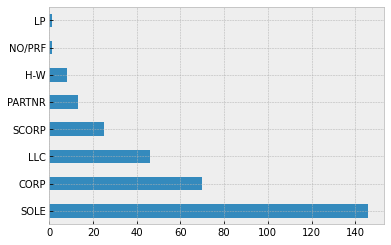

In [6]:
osb_11_gdf[['Name', 'Home?', 'New?', 'Type', 'NAICS', 'NAICS Desc','Start', 'Employees']]['Type'].value_counts().plot(kind='barh')